In [1]:
%load_ext autoreload
%autoreload 2

! pip install -r requirements.txt

import json
from crawl.saliency import get_block_features, BrowserContext
from vips.vips.block_vo import BlockVo
from typing import List
import pandas as pd
from label import setup_webdriver, draw_site_with_blocks, load_website, plt

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the 'c:\Users\saidh\Anaconda3\python.exe -m pip install --upgrade pip' command.


ImportError: cannot import name 'BrowserContext' from 'crawl.types' (c:\Users\saidh\Documents\Summer@EPFL\SaliencyDataset\crawl\attention\types.py)

In [2]:
datadir_path = "dataset-25.07.2022/data.json"
with open(datadir_path, 'r') as f:
    data = json.load(f)

In [4]:
# number of blocks

print("all blocks: ", len(data))

# number of important blocks
print("primary blocks:", len([1 for d in data if d['label'] == 1]))

all blocks:  2556
primary blocks: 493


In [100]:
class BoxStruct:
    def __init__(self, **args):
        self.__dict__.update(args)

class BlockStruct:
    def __init__(self, **args):

        self.id: str
        self.x: float
        self.y: float
        self.width: float
        self.height: float
        self.isVisualBlock: bool

        for key, val in args.items():
            if key != "boxs":
                self.__setattr__(key,val)
            else:
                boxs = [BoxStruct(**x) for x in val]
                self.__setattr__(key, boxs)

def make_block_df(blocks: List[BlockStruct]):

    grouped_by_url = {}

    for b in blocks:
        if b.url not in grouped_by_url:
            grouped_by_url[b.url] = []
        
        grouped_by_url[b.url].append(b)

    bf = [
        get_block_features(block, grouped_by_url[block.url], BrowserContext(**block.context)) 
        for block in blocks]
    
    for i, b in enumerate(bf):
        b['label'] = blocks[i].label
        b['id'] = blocks[i].id
        b['url'] = blocks[i].url

    return pd.DataFrame(bf)

block_df = make_block_df([BlockStruct(**b) for b in data])
block_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   center_x        2556 non-null   float64
 1   center_y        2556 non-null   float64
 2   width           2556 non-null   float64
 3   height          2556 non-null   float64
 4   pop_center_x    2556 non-null   float64
 5   pop_center_y    2556 non-null   float64
 6   centrality      2556 non-null   float64
 7   num_nodes       2556 non-null   int64  
 8   num_functional  2556 non-null   float64
 9   num_text        2556 non-null   float64
 10  num_layout      2556 non-null   float64
 11  text_length     2556 non-null   int64  
 12  fs              2556 non-null   float64
 13  fw              2556 non-null   float64
 14  vb              2556 non-null   float64
 15  label           2556 non-null   int64  
 16  id              2556 non-null   object 
 17  url             2556 non-null   o

In [101]:
block_df.describe()

,center_x,center_y,width,height,pop_center_x,pop_center_y,centrality,num_nodes,num_functional,num_text,num_layout,text_length,fs,fw,vb,label
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000
mean,0.511144,0.433709,0.123448,0.053980,0.483613,0.483613,0.793685,1.327074,0.472320,0.464596,0.062493,28.753130,15.732968,493.987044,0.012867,0.192879
std,0.204817,0.300671,0.179578,0.106626,0.058174,0.058174,0.278470,1.189742,0.479821,0.479379,0.231300,61.729988,6.533885,124.996698,0.094650,0.394636
min,0.000253,-0.000309,0.000505,0.000617,0.283493,0.283493,0.091970,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000
25%,0.358132,0.151653,0.024242,0.010370,0.462159,0.462159,0.593895,1.000000,0.000000,0.000000,0.000000,5.000000,13.000000,400.000000,0.000000,0.000000
50%,0.502010,0.415669,0.050985,0.015432,0.487818,0.487818,0.849744,1.000000,0.333333,0.250000,0.000000,9.000000,14.000000,400.000000,0.000000,0.000000
75%,0.667744,0.700887,0.132933,0.038596,0.501721,0.501721,1.010897,1.000000,1.000000,1.000000,0.000000,22.000000,16.000000,600.000000,0.000000,0.000000
max,0.998737,0.947119,1.292929,0.947531,0.685433,0.685433,1.273148,22.000000,1.000000,1.000000,1.000000,1037.000000,110.000000,900.000000,1.000000,1.000000


In [103]:
import classify as cl
cl.pipeline(block_df, "classify-out", True, True, True)

INFO Total Number of sample IDs: 4126

INFO Number of sample IDs to use in a fold: 412

INFO Performing fold: 0

INFO Accuracy Score: 0.968447

INFO Performing fold: 1

INFO Accuracy Score: 0.924757

INFO Performing fold: 2

INFO Accuracy Score: 0.934466

INFO Performing fold: 3

INFO Accuracy Score: 0.946602

INFO Performing fold: 4

INFO Accuracy Score: 0.949029

INFO Performing fold: 5

INFO Accuracy Score: 0.915049

INFO Performing fold: 6

INFO Accuracy Score: 0.893204

INFO Performing fold: 7

INFO Accuracy Score: 0.895631

INFO Performing fold: 8

INFO Accuracy Score: 0.866505

INFO Performing fold: 9

INFO Accuracy Score: 0.531553




Block 8247 0.0030763309006481376 (420, 14, 1138.0000610351562, 590)

Location <crawl.block_vo.BlockVo object at 0x0000022F363D9548>
button [{'key': 'type', 'value': 'button'}, {'key': 'class', 'value': '_1XuCi2WhiqeWRUVp3pnFG3 erL690_8JwUW-R4bJRcfl'}] {'bounds': {'x': 1405, 'y': 14, 'width': 150, 'height': 36, 'top': 14, 'right': 1555, 'bottom': 50, 'left': 1405}, 'font-size': '15px', 'font-weight': '400', 'background-color': 'rgb(235, 235, 235)', 'display': 'inline-block', 'visibility': 'visible', 'is_visible': True, 'text': 'Accept', 'className': '_1XuCi2WhiqeWRUVp3pnFG3 erL690_8JwUW-R4bJRcfl'} Accept
div [{'key': 'id', 'value': 'marketPlaceLogoLink'}, {'key': 'class', 'value': 'marketPlaceLogoLink marketplacetext-header'}, {'key': 'aria-label', 'value': 'Marketplace logo'}] {'bounds': {'x': 514.63330078125, 'y': 66.5, 'width': 103.94999694824219, 'height': 21, 'top': 66.5, 'right': 618.5832977294922, 'bottom': 87.5, 'left': 514.63330078125}, 'font-size': '16px', 'font-weight': '400

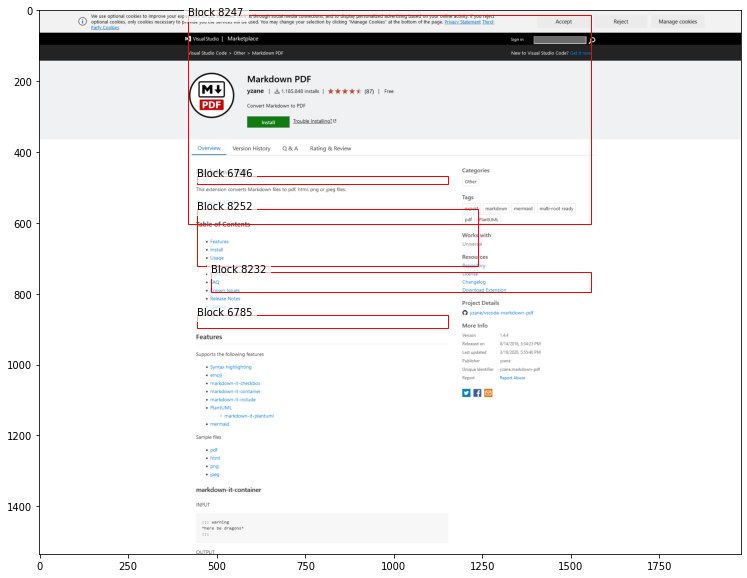

In [108]:
# test on a website
def debug_page(url):
    driver = setup_webdriver()
    ((blocks, scores), web_screenshot, browser_context) = load_website(
        url,
        driver,
    )
    bf = pd.DataFrame([
        get_block_features(block, blocks, browser_context) 
        for block in blocks])
        
    clf = cl.load_model('classify-out/model_0.joblib')

    labels = cl.classify_with_model(clf, bf)

    imp_blocks = []
    unimp_blocks = []

    for i, b in enumerate(blocks):

        if labels[i] ==1 :
            imp_blocks.append(b)
        else:
            unimp_blocks.append(b)

    fig, ax = plt.subplots(figsize=(14, 10))

    draw_site_with_blocks(ax, imp_blocks, scores, web_screenshot, browser_context)


debug_page("https://marketplace.visualstudio.com/items?itemName=yzane.markdown-pdf")

    